In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv("PCOS_data.csv")

# Dropping unnecessary columns
if 'Unnamed: 44' in data.columns:
    data.drop('Unnamed: 44', axis=1, inplace=True)
data.drop('Sl. No', axis=1, inplace = True)
data

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(cm),BMI,Blood Group,Pulse_rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.500,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.000,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.000,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.000,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [3]:
# Checking column names in the dataset
print(data.columns)

Index(['Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(cm)', 'BMI', 'Blood Group', 'Pulse_rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


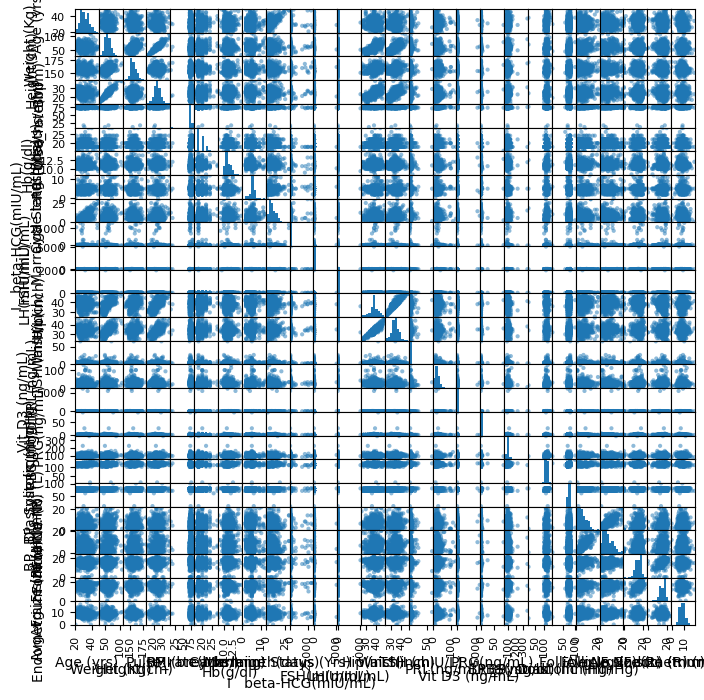

In [4]:
#Scatter Plot Matrix for Quantitative Variables
quantitative_cols = ['Age (yrs)', 'Weight (Kg)', 'Height(cm)', 'BMI', 'Pulse_rate(bpm)', 
                     'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 
                     'Marraige Status (Yrs)', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 
                     'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
                     'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 
                     'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 
                     'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 
                     'Avg. F size (R) (mm)', 'Endometrium (mm)']

# Scatter plot for quantitative columns
pd.plotting.scatter_matrix(data[quantitative_cols], figsize=(8, 8))
plt.show()

In [5]:
# Step 1: Convert all relevant columns to numeric, handling errors
for col in data.columns:
    if col != 'PCOS (Y/N)':  # Exclude the target variable
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, set invalid values as NaN

# Step 2: Drop rows with NaN values if necessary (optional)
# data.dropna(inplace=True)

# Step 3: Correlation Analysis
# Find features that have the highest correlation with the target variable
correlation_with_target = data.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
FSH/LH                    0.246457
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
Age (yrs)                 0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse_rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Patient File No.    

In [6]:
# Step 4: Selecting Top 10 Features
best_features = correlation_with_target[0:11]  # Gives us top 10 features with high correlation
print(best_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
FSH/LH                  0.246457
Name: PCOS (Y/N), dtype: float64


In [7]:
# Step 5: Create a New Dataset with Selected Features
selected_columns = best_features.index.to_list()
new_data = data[selected_columns]

new_data

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),FSH/LH
0,0,3,3,0,0,0,2,1.0,0,2.07,NaN
1,0,5,3,0,0,0,2,0.0,0,1.53,NaN
2,1,15,13,0,0,0,2,1.0,1,6.63,NaN
3,0,2,2,0,0,0,2,0.0,0,1.22,NaN
4,0,4,3,0,0,0,2,0.0,0,2.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,1,0,0,0,2,0.0,0,1.70,NaN
537,0,7,9,0,0,1,2,0.0,0,5.60,NaN
538,0,0,1,0,0,0,2,0.0,0,3.70,NaN
539,0,6,7,0,0,0,4,0.0,1,5.20,NaN


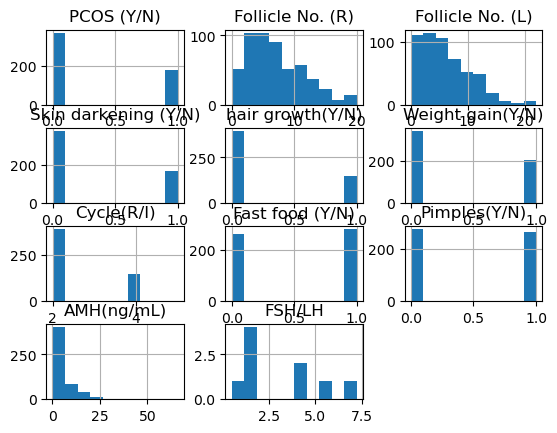

In [8]:
new_data.hist()
plt.show()

From the histogram, we can observe that weight has gaussian distribution that is the data is normally distributed and features like follicle L and follicle R have skewed distribution. The remaining features have outliers



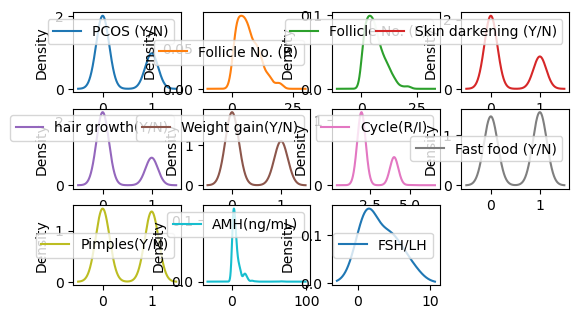

In [9]:
new_data.plot(kind='density',subplots=True,layout=(4,4),sharex=False)
plt.show()

The density plot shows the peak points where the values are concentrated for all the selected features. We can interpret the peak values for all the attributes from the graph.

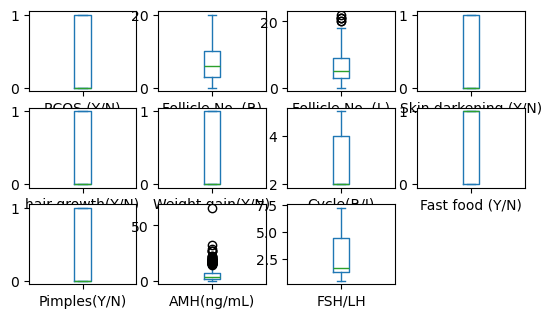

In [10]:
new_data.plot(kind='box',subplots=True,layout=(4,4),sharex=True,sharey=False)
plt.show()

Boxplot shows us the features having outliers. From the plot, we can observe that weight and follicle L have outliers.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = data[['Follicle No. (L)']].values
y = data['PCOS (Y/N)'].values.ravel() 
model=LogisticRegression(solver='liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [12]:
pred_prob=model.predict_proba(X)
print(pred_prob)
y_pred=model.predict(X)
print(y_pred)
conf=confusion_matrix(y,y_pred)
print(conf)
score=model.score(X,y)
print(score)

[[0.89492161 0.10507839]
 [0.89492161 0.10507839]
 [0.13849725 0.86150275]
 ...
 [0.94959767 0.05040233]
 [0.63508318 0.36491682]
 [0.44031472 0.55968528]]
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 

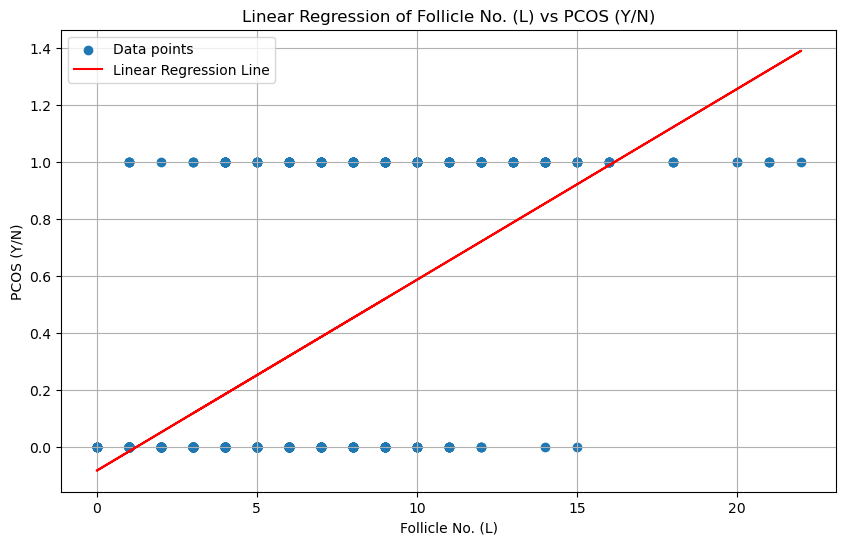

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Follicle No. (L)')
plt.ylabel('PCOS (Y/N)')
plt.title('Linear Regression of Follicle No. (L) vs PCOS (Y/N)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)

# Print model coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"model score: {model.score(X, y)}")

Coefficients: [0.0669947]
Intercept: -0.08346474051801506
model score: 0.36402658028797485


The coefficient of x is 0.0669947 for Regression Equation of Follicle No. (L) respect to PCOS (Y/N) for Data The intercept is -0.08346474051801461 for Regression Equation of Follicle No. (L) respect to PCOS (Y/N) for Data The score is 0.36402658028797485 for Regression Equation of Follicle No. (L) respect to PCOS (Y/N) for Data The Linear Regression Equation of Follicle No. (L) respect to PCOS (Y/N) for Data is y=0.0669947X-0.08346474051801461

Decision Tree Accuracy: 78.53%


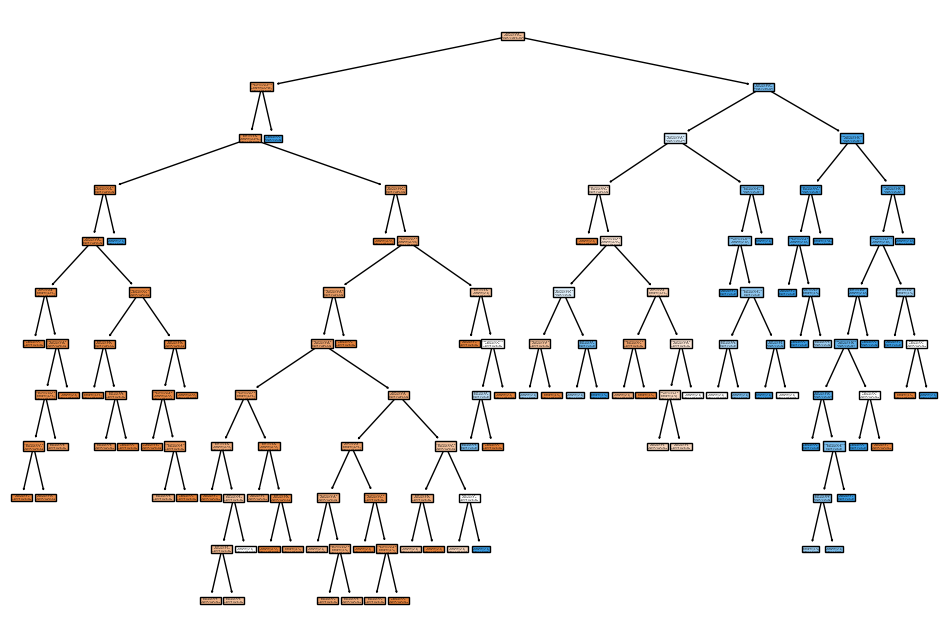

In [15]:
# Import necessary libraries for the decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

# Step 6: Defining Features (X) and Target (y)
X = data[["Follicle No. (L)", "Follicle No. (R)"]]  # Features
y = data['PCOS (Y/N)']  # Target variable

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Step 9: Train the Decision Tree Classifier
decision_tree.fit(X_train, y_train)

# Step 10: Predicting the Test Results
y_pred = decision_tree.predict(X_test)

# Step 11: Evaluate the Decision Tree Model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Step 12: Visualizing the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree, feature_names=['Age (yrs)', 'BMI', 'Hb(g/dl)'], class_names=['No PCOS', 'PCOS'], filled=True)
plt.show()


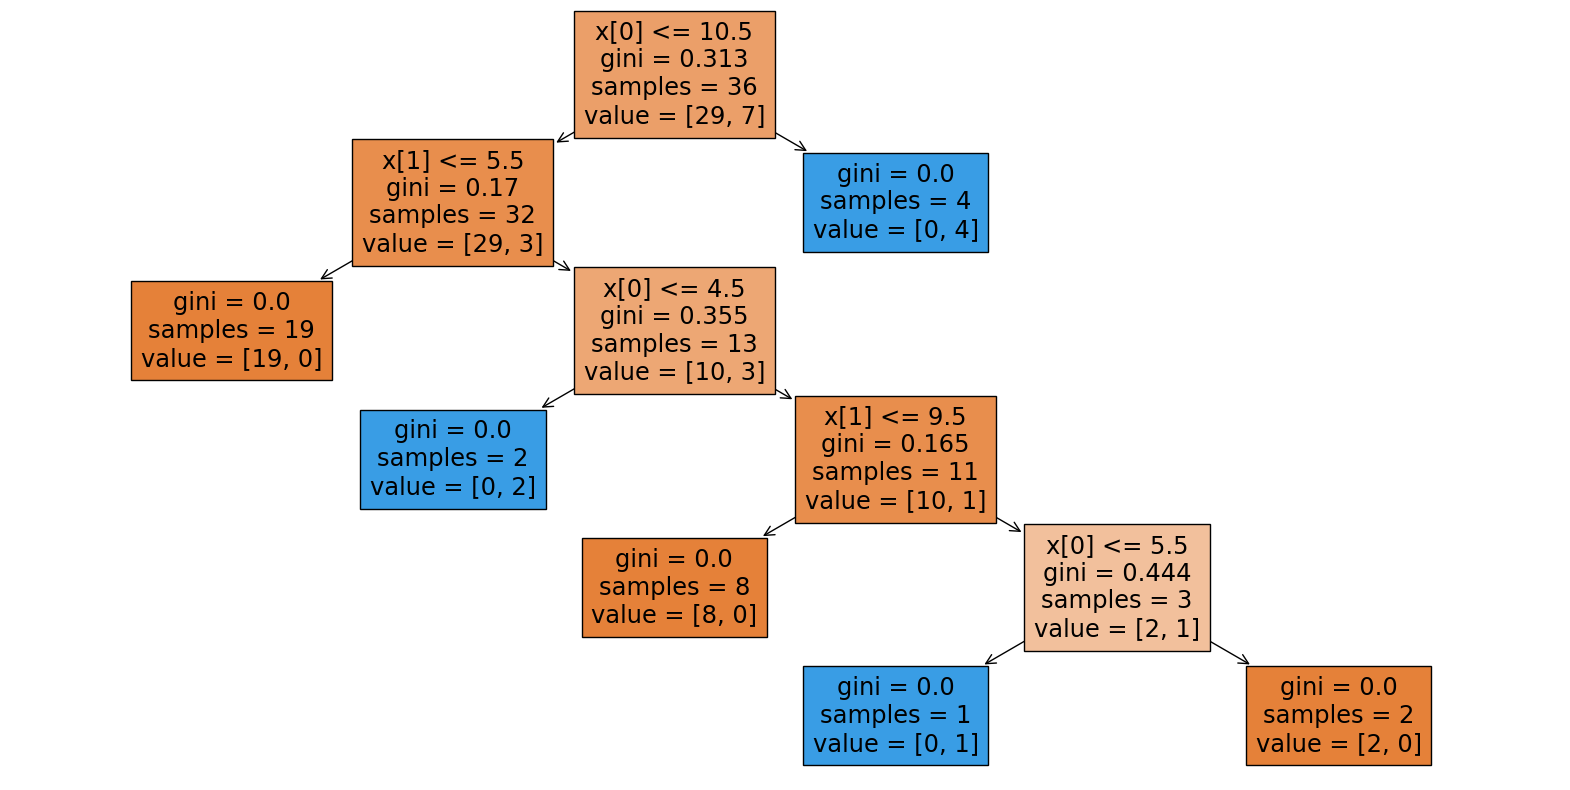

In [16]:
#Select few 
X = X.iloc[0:49,:]
y = y.iloc[0:49]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Define the Decision Tree model
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# make the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True)
plt.show()

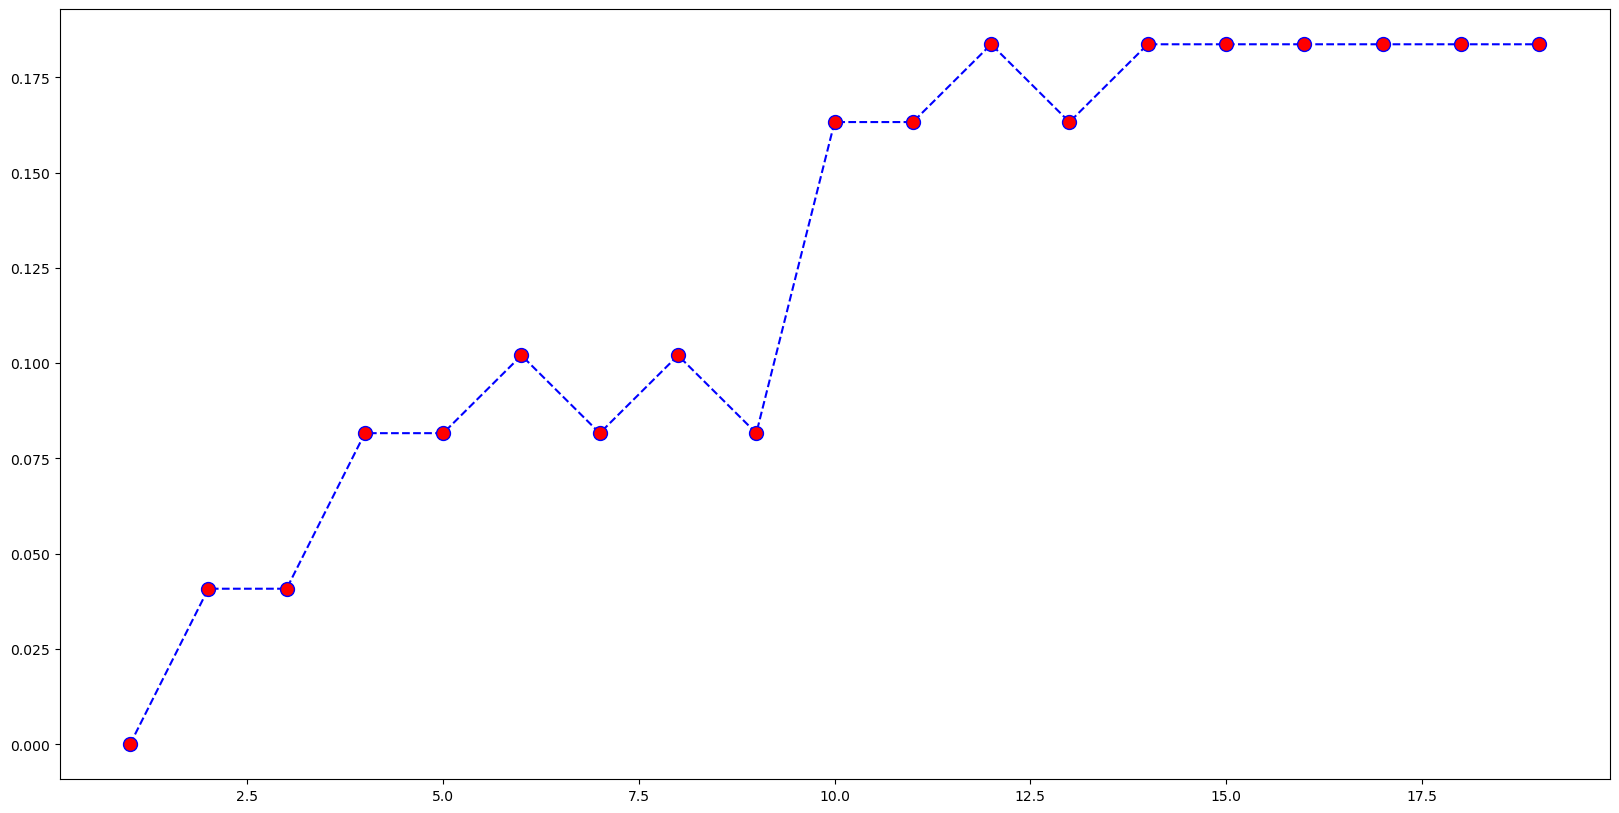

In [17]:
#ELBOW GRAPH
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
SSE=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred_i=knn.predict(X)
    SSE.append(np.mean(pred_i != y))
plt.figure(figsize=(20,10))
plt.plot(range(1,20),SSE,color='b',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.show()

C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

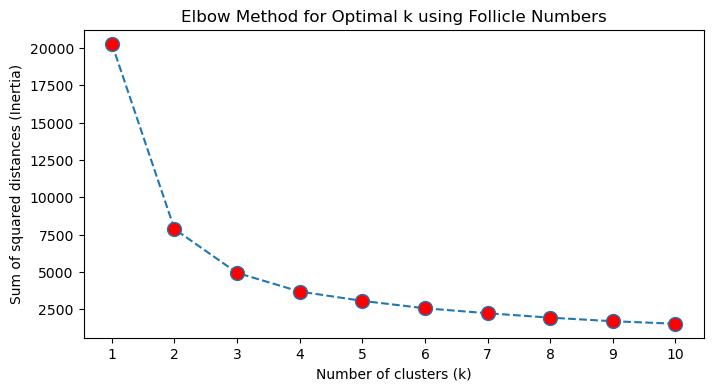

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = data[["Follicle No. (L)", "Follicle No. (R)"]]
SSE = []

for k in range(1, 11): 
    km = KMeans(n_clusters=k, random_state=0)  
    km.fit(features) 
    SSE.append(km.inertia_) 


# Plotting the elbow graph
plt.figure(figsize=(8, 4))  # Adjusted size for a smaller graph
plt.plot(range(1, 11), SSE, linestyle='dashed', marker='o', markerfacecolor='r', markersize=10)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method for Optimal k using Follicle Numbers')
plt.xticks(range(1, 11))  # Set x-ticks to show every integer in the range
plt.show()

The 2 selected features are Follicle No. (L) and Follicle No. (R) and the target column is PCOS.
From the elbow graph, we can choose 4 as best n neighbours.


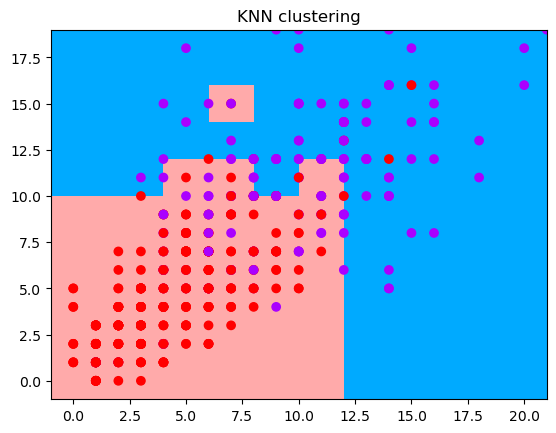

In [19]:
# Select the features and target variable
X = data[["Follicle No. (L)", "Follicle No. (R)"]]  
y = data['PCOS (Y/N)']

from matplotlib.colors import ListedColormap
n_neighbors=4
X=X.values[:,0:2]
h=2
clf=KNeighborsClassifier(n_neighbors,weights='distance')
clf.fit(X,y)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1  # x axis DMC
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1  # y axis wind
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) # grids
cmap_l =ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted
cmap_d =ListedColormap(['#FF0000','#00FF00','#AA00FF']) # actual

Z= clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted values on back
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("KNN clustering")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

train_accuracy = clf.score(X_train, y_train) 
test_accuracy = clf.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

0.8765432098765432
0.8823529411764706


In [21]:
#Naive bayes

In [22]:
X = data[['Blood Group','BMI']].values
k = data['Blood Group'].nunique()
print("Number of clusters:", k)

Number of clusters: 8


In [23]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
pred_K = kmeans.predict(X)

C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


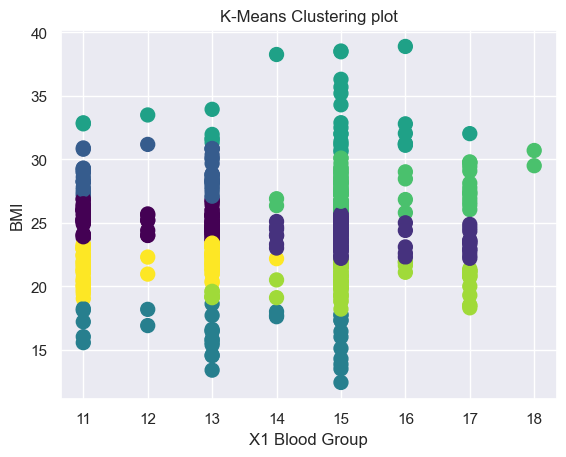

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.scatter(X[:,0],X[:,1],c=pred_K, s=100, cmap= 'viridis')
centers = kmeans.cluster_centers_
plt.title('K-Means Clustering plot')
plt.xlabel('X1 Blood Group')
plt.ylabel('BMI')
plt.show()

There are people with all four blood groups and a wide range of BMIs.
Based on the plot, we can observe that not all clusters are displayed for each label.
 Some points are overlapped and eight colors are represented for eight clusters.

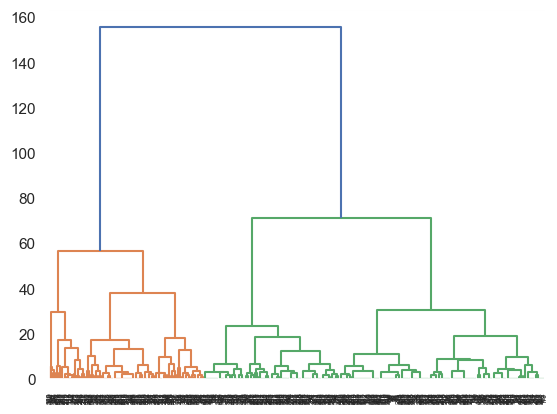

In [25]:
#Hierarchy clsutering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = data[["Follicle No. (L)", "Follicle No. (R)"]]  # Features

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Make the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
# find the proximity matrix
links=linkage(X, method='ward', metric='euclidean')
# print(links)
dendrogram(links)
plt.show()


In [26]:
#Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = data[["Follicle No. (L)", "Follicle No. (R)"]]
#split data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
# define and fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

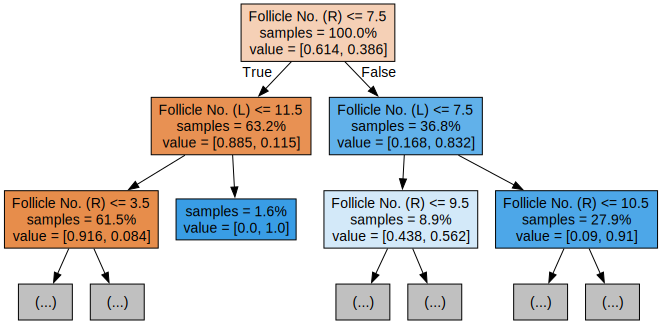

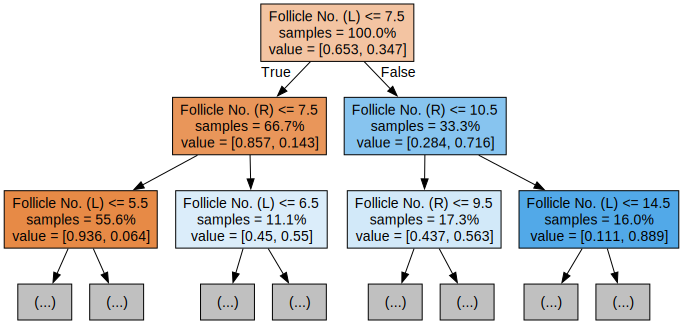

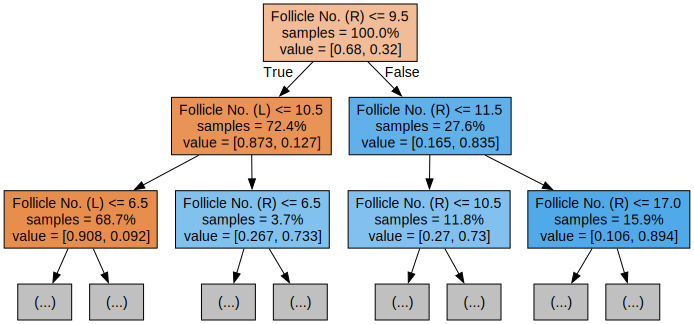

In [27]:
#plotting forest
from sklearn.tree import export_graphviz
import graphviz
X_train =pd.DataFrame(X_train)
for i in range(3):
    tree=clf.estimators_[i]
    nodes=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(nodes)
    display(graph)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming 'data' is your DataFrame containing the features and target
X = data[["Follicle No. (L)", "Follicle No. (R)"]]
y = data['PCOS (Y/N)']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model and fit it
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", CM)

AS = accuracy_score(y_test, y_pred) 
print("Accuracy Score:", AS)

CR = classification_report(y_test, y_pred)  
print("Classification Report:\n", CR)

Confusion Matrix:
 [[75  1]
 [11 22]]
Accuracy Score: 0.8899082568807339
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93        76
           1       0.96      0.67      0.79        33

    accuracy                           0.89       109
   macro avg       0.91      0.83      0.86       109
weighted avg       0.90      0.89      0.88       109



In [29]:
# define and fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

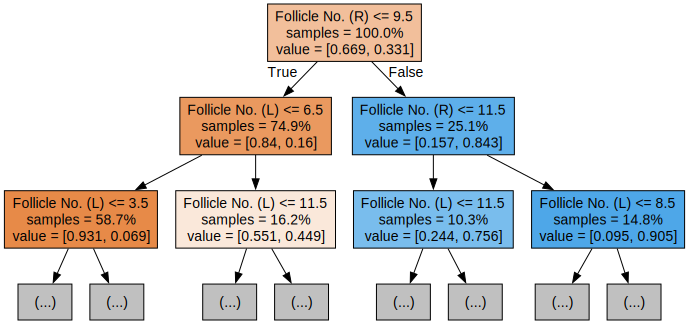

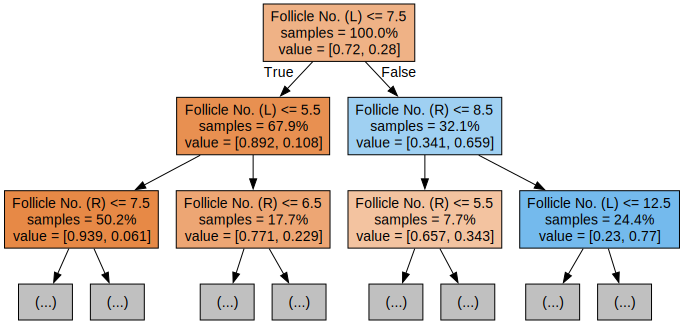

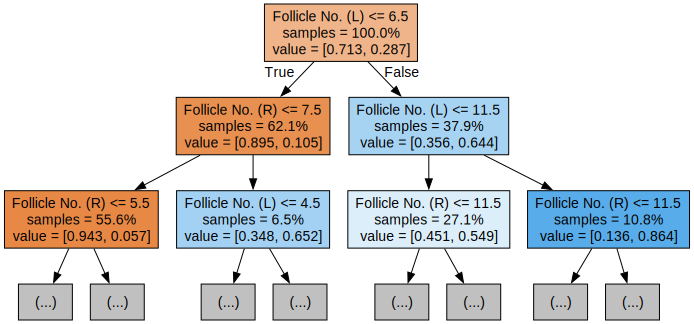

In [30]:
#plotting forest
from sklearn.tree import export_graphviz
import graphviz
X_train =pd.DataFrame(X_train)
for i in range(3):
    tree=clf.estimators_[i]
    nodes=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(nodes)
    display(graph)

From the above applied models,we have determined the accuracy scores of different models on our data as follows:
Logistic regression-0.804
Linear regression-0.364
Decision tree-0.78 
KNN-0.830
Random forest-0.88
After evaluating multiple machine learning models, the most suitable model is selected by comparing and analyzing their accuracy scores.
The model with highest accuracy score on our dataset is “Random forest algorithm ” with accuracy score of ”88% ”.

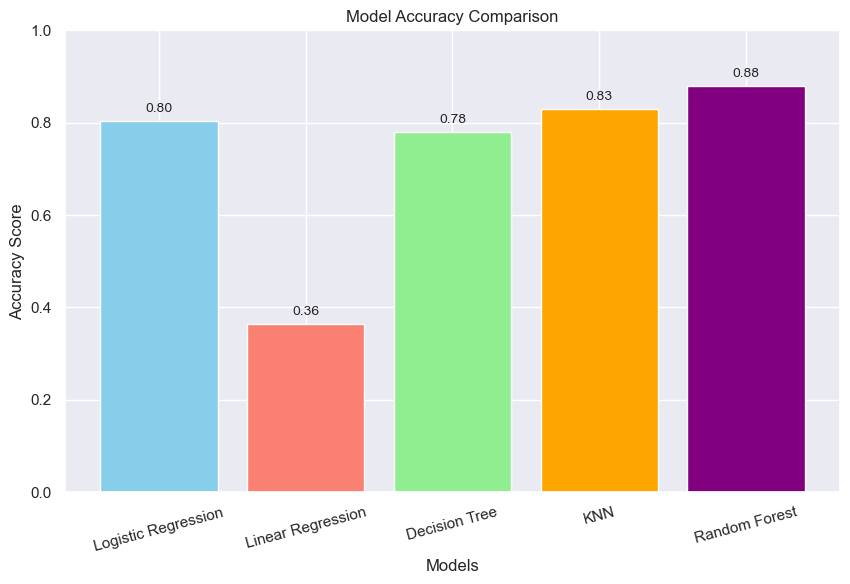

In [31]:
import matplotlib.pyplot as plt

# Model names and their respective accuracy scores
models = ['Logistic Regression', 'Linear Regression', 'Decision Tree', 'KNN', 'Random Forest']
accuracy_scores = [0.804, 0.364, 0.78, 0.83, 0.88]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better comparison
plt.xticks(rotation=15)

# Display the accuracy scores on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=10)

# Show the plot
plt.show()